In [24]:
import pandas as pd
import graphviz

In [331]:
class Node:
    def __init__(self,name):
        self.name = name
        self.in_nodes = set()
        self.out_nodes = set()
        
    def add_in_node(self, node):
        self.in_nodes.add(node)
        
    def remove_in_node(self, node):
        self.in_nodes.remove(node)
        
    def add_out_node(self, node):
        self.out_nodes.add(node)
        
    def remove_out_node(self, node):
        self.out_nodes.remove(node)
        
    def depth(self):
        depth = 0
        if self.in_nodes:
            depth = max([ n.depth() + 1 for n in self.in_nodes])
        return depth
                          
    def __str__(self):
        return "{}".format(self.name)

class Graph:
    def __init__(self):
        self.nodes = {}
        self.edges_in = {}
        self.edges_out = {}
        self.node_depth = {}
    
    def add_node(self,node):
        self.nodes[node]  = Node(node)
        self.edges_in[node] = []
        self.edges_out[node] = []
        self.node_depth[node] = 0
        
        
#     def calculate_depth(self,):
        
#         for node in self.edges_out[root]:
#             self.node_depth[node] = depth +1
#             self.calculate_depth(node,depth+1)
            
        
#     def calculate_node_depth(self, node):
#         depths = [-1,]
#         for in_node in self.edges_in[node]:
#             print("calc: ", in_node)
#             depths.append(self.node_depth[in_node])
#         d = max(depths)
#         self.node_depth[node] = d+1
#         for out_node in self.edges_out[node]:
            
#         for k,v in self.node_depth.items():
#             print(v,d)
#             if v>=d:
#                 v = v+1
        
    def add_edge(self, node_x, node_y):
        if node_y not in self.edges_out[node_x]:
            print("Adding edge from {} to {}".format(node_x,node_y))
            self.edges_out[node_x].append(node_y)
            self.nodes[node_x].add_out_node(self.nodes[node_y])

            self.edges_in[node_y].append(node_x)
            self.nodes[node_y].add_in_node(self.nodes[node_x])
        
        #self.node_depth[node_y] =  self.calculate_node_depth(node_y)
        
    def remove_edge(self, node_x, node_y):
        print("Removing edge from {} to {}".format(node_x,node_y))
        try:
            self.edges_out[node_x].remove(node_y)
            self.nodes[node_x].remove_out_node(self.nodes[node_y])    
            
            self.edges_in[node_y].remove(node_x)
            self.nodes[node_y].remove_in_node(self.nodes[node_x]) 
            
            #self.node_depth[node_y] =  self.calculate_node_depth(node_y)
        except ValueError:
            print("Edge does not exist")
     
    def calculate_node_depth(self):
        for alg,node in self.nodes.items():
            self.node_depth[alg] = node.depth()
            
    def get_nodes_at_depth(self,depth):
        #self.calculate_node_depth()
        df = pd.DataFrame(self.node_depth.items())
        return list(df.loc[df[1] == depth][0])
    
    def visualize(self):
        g = graphviz.Digraph()
        for node in self.nodes.keys():
            g.node(node)
        for node1,v in self.edges_out.items():
            for node2 in v:
                g.edge(node1, node2)
        return g
        

In [294]:
g = Graph()

In [295]:
g.add_node('A')
g.add_node('B')
g.add_node('C')

In [296]:
g.calculate_node_depth()

In [297]:
g.node_depth

{'A': 0, 'B': 0, 'C': 0}

In [298]:
g.get_nodes_at_depth(0)

['A', 'B', 'C']

In [299]:
g.add_edge('A','B')
g.add_edge('B','C')

Adding edge from A to B
Adding edge from B to C


In [300]:
g.calculate_node_depth()
g.node_depth

{'A': 0, 'B': 1, 'C': 2}

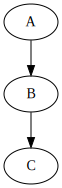

In [301]:
g.visualize()

In [302]:
g.remove_edge('A','B')
g.add_edge('A','C')
g.add_edge('B','C')

Removing edge from A to B
Adding edge from A to C
Adding edge from B to C


In [303]:
g.calculate_node_depth()
g.node_depth

{'A': 0, 'B': 0, 'C': 1}

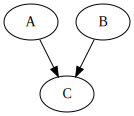

In [304]:
g.visualize()

In [130]:
g.edges_out

{'A': ['B'], 'B': []}

In [172]:
g.calculate_node_depth()
g.get_nodes_at_depth(0), g.get_nodes_at_depth(1)

(['A', 'B', 'C'], [])

In [173]:
g.remove_edge('A','B')

Edge does not exist


In [174]:
g.calculate_node_depth()
g.get_nodes_at_depth(0), g.get_nodes_at_depth(1)

(['A', 'B', 'C'], [])

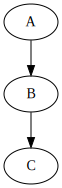

In [182]:
g.visualize()

In [262]:
def init_graph(h0):
    graph = Graph()
    
    for alg in h0:
        graph.add_node(alg)
        
    for i in range(len(h0)):
        if i!=len(h0)-1:
            graph.add_edge(h0[i], h0[i+1])
          
    graph.calculate_node_depth()
    return graph

In [263]:
h0 = ['alg0', 'alg1', 'alg2', 'alg3']
g = init_graph(h0)

In [264]:
g.node_depth

{'alg0': 0, 'alg1': 1, 'alg2': 2, 'alg3': 3}

In [265]:
g.remove_edge('alg0','alg1')

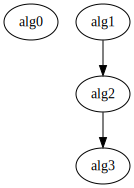

In [266]:
g.visualize()

In [191]:
g.calculate_node_depth()
g.node_depth

{'alg0': 0, 'alg1': 0, 'alg2': 1, 'alg3': 2}

In [347]:
def compare(alg1, alg2):
    return 0

class Rank:
    def __init__(self, graph):
        self.graph = graph
        self.start = self.graph.get_nodes_at_depth(0)[0]
        self.preset = graph.edges_in.copy()
        self.visited_sets = []
                
    def next_unvisited_preset2(self,start):
        queue = []
        queue.append(start)
        while queue:
            alg = queue.pop(0)
            in_nodes = self.graph.edges_in[alg].copy()
            unvisited = []
            for node in in_nodes:
                node_set = {node,alg}
                if node_set not in self.visited_sets:
                    unvisited.append(node)
                    self.visited_sets.append(node_set)
                    
            if unvisited:
                return (unvisited, alg)
            
            elif self.graph.edges_out[alg]:
                for alg_x in self.graph.edges_out[alg]:
                    queue.append(alg_x)
        return (None,None)
    
    
#     def next_unvisited_preset(self,start):
#         queue = []
#         queue.append(start)
#         while queue:
#             alg = queue.pop(0)
#             if self.preset[alg]:
#                 preset = self.preset[alg].copy()
#                 self.preset[alg] = []
#                 return (preset, alg)
#             elif self.graph.edges_out[alg]:
#                 for alg_x in self.graph.edges_out[alg]:
#                     queue.append(alg_x)
#         return (None,None)
    
    def compare_preset(self, preset, alg_y):
        x_gt_y = []
        x_eq_y = []
        for alg_x in preset:
            ret = compare(alg_x,alg_y)
            if ret == 1:
                x_gt_y.append(alg_x)
            elif ret == -1:
                x_eq_y.append(alg_x)
        return (x_gt_y, x_eq_y)
    
    def add_edges_from_depth(self,depth,alg_y):
        add_edges=[]
        if depth>=0:
            add_edges.append(self.graph.get_nodes_at_depth(depth))
          
        for alg_x in add_edges:
            self.graph.add_edge(alg_x,alg_y)
            
    
    def reverse_edges(self, x_gt_y, alg_y):
        #depth = self.graph.node_depth[alg_y]-2
        for alg_x in x_gt_y:
            self.graph.remove_edge(alg_x,alg_y)
            self.graph.add_edge(alg_y,alg_x)
            
    def remove_edges_from_nodes(self, from_nodes,alg_y):
        for alg_x in from_nodes:
            self.graph.remove_edge(alg_x,alg_y)
            
    def add_edges_from_nodes(self, from_nodes,alg_y):
        for alg_x in from_nodes:
            #print("adding edge from  {} to {}".format(alg_x, alg_y))
            self.graph.add_edge(alg_x,alg_y)
            
            
    def remove_edges_to_nodes(self, to_nodes,alg_x):
        for alg_y in to_nodes:
            self.graph.remove_edge(alg_x,alg_y)
            
    def add_edges_to_nodes(self, to_nodes,alg_x):
        for alg_y in to_nodes:
            self.graph.add_edge(alg_x,alg_y)
       
    
    def modify_graph(self,preset,alg_y):
        x_gt_y, x_eq_y = self.compare_preset(preset, alg_y)
            
        if x_gt_y or len(x_eq_y) == len(preset):
            self.graph.calculate_node_depth()
            depth_above = self.graph.node_depth[alg_y]-2
            depth_below = self.graph.node_depth[alg_y]+1
            from_nodes = self.graph.get_nodes_at_depth(depth_above)
            to_nodes = self.graph.get_nodes_at_depth(depth_below)

            self.add_edges_from_nodes(from_nodes,alg_y)
            for alg_x in x_gt_y:
                self.remove_edges_from_nodes(from_nodes,alg_x)


        self.reverse_edges(x_gt_y,alg_y)
        self.remove_edges_from_nodes(x_eq_y,alg_y)

        if x_gt_y:
            self.remove_edges_to_nodes(to_nodes, alg_y)
            for alg_x in x_gt_y:
                self.add_edges_to_nodes(to_nodes,alg_x)

        elif len(x_eq_y) == len(preset):
            self.graph.calculate_node_depth()
            for alg_x in to_nodes:
                if self.graph.node_depth[alg_x] != self.graph.node_depth[alg_y]+1:
                    self.remove_edges_to_nodes([alg_x,],alg_y)

            
            equivalent_nodes = self.graph.get_nodes_at_depth(self.graph.node_depth[alg_y])
            to_nodes_ = self.graph.edges_out[alg_y].copy()
            for _x in to_nodes_:
                self.add_edges_from_nodes(equivalent_nodes,_x)
                

    def rank_nodes(self):
        root = self.start
        d_graphs = []
        
        preset,alg_y = self.next_unvisited_preset2(root)
        print(preset, alg_y)
        while preset:
            self.modify_graph(preset,alg_y)
            d_graphs.append(self.graph.visualize())
            preset,alg_y = self.next_unvisited_preset2(alg_y)    
            print(preset, alg_y)

        return d_graphs
            
            
            
            

                    
            
        
        
            
            
        


In [348]:
rank = Rank(g)

In [349]:
rank.visited_sets

[]

In [350]:
rank.next_unvisited_preset2('alg0')

(None, None)

In [351]:
h0 = ['alg0', 'alg1', 'alg2', 'alg3']
g = init_graph(h0)
rank = Rank(g)

Adding edge from alg0 to alg1
Adding edge from alg1 to alg2
Adding edge from alg2 to alg3


In [352]:
history = rank.rank_nodes()

['alg0'] alg1
['alg1'] alg2
['alg2'] alg3
None None


In [353]:
len(history)

3

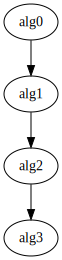

In [354]:
history[0]

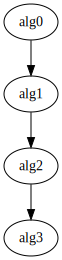

In [355]:
history[1]

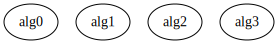

In [346]:
history[2]

In [339]:
#     def queue(self, start):
#         next_ = None
#         if self.preset[start]: #if .start is not empty:
#             next_ = (self.preset[start].pop(0), start)
#         elif self.edges[start]: #if start. is not empty
#             i = 0
#             next_ = self.queue(self.edges[start][i])
#             while not next_ and i < len(self.edges[start])-1:
#                 i = i+1
#                 next_ = self.queue(self.edges[start][i])
#         return next_
    
    
#     def swap_edges(self, preset, alg_y):
        
#         x = []
#         for alg_x in preset:
#             x = x+self.preset[alg_x]
#         x = list(set(x))
        
        
        
#         self.edges[alg1].remove(alg2)
        
#         tmp = self.edges[alg1].copy()
#         self.edges[alg1] = self.edges[alg2].copy()
#         self.edges[alg2] = tmp
        
#         self.edges[alg2].append(alg1)
        
#         #add incomoming edges to alg2 from algs in equivalent sets
  

#     def compare_presets(self, preset, alg_y):
#         x_gt_y = []
#         x_eq_y = []
#         for alg_x in preset:
#             ret = compare(alg_x,alg_y)
#             if ret == 1:
#                 x_gt_y.append(alg_x)
#             elif ret == -1:
#                 x_eq_y.append(alg_x)
        
        
        
            
        
        
        
    
#     def rank_variants(self):
        
#         root = self.start
        
#         presets,alg = self.bfs_next(root)
        
#         rets = []
#         for alg_in in presets:
#             rets.append(compare(preset,alg))
            
#         promote = False
#         if rets.count(1)>1 or rets.count(-1) == len(rets)
#             promote = True
            
#         if pr
            
            
#             self.preset[alg].remove(preset)
            
#         if ret.count(1) >= 1:
#             ## update  rank
            
        
        
        
#         while alg2 == alg:
#             alg1,alg2 = self.bfs_next(alg)
#             l.append(alg1)
            
        
#         queue = []
#         rank =0
#         queue.append(rank)
        
#         while queue:
#             rank = queue.sort().pop(0)
#             r_k = self.rank[rank]
            
#             for alg in r_k:
#                 alg1, alg2 = self.bfs_next(alg)
            
        
#         start = self.start
#         next_ = self.queue(start)
        
#         while next_:
#             alg1, alg2 = next_
#             ret = compare(alg1, alg2)
            
#             if ret == 1:
#                 self.swap_edges(alg1,alg2)
            
#             next_ = self.queue(alg2) 
    
            
            
            
        